# AWS Glue Studio Notebook
##### You are now running a AWS Glue Studio notebook; To start using your notebook you need to start an AWS Glue Interactive Session.


In [2]:
print("Hello World")

Hello World


#### Optional: Run this cell to see available notebook commands ("magics").


In [2]:
%help


# Available Magic Commands

## Sessions Magic

----
    %help                             Return a list of descriptions and input types for all magic commands. 
    %profile            String        Specify a profile in your aws configuration to use as the credentials provider.
    %region             String        Specify the AWS region in which to initialize a session. 
                                      Default from ~/.aws/config on Linux or macOS, 
                                      or C:\Users\ USERNAME \.aws\config" on Windows.
    %idle_timeout       Int           The number of minutes of inactivity after which a session will timeout. 
                                      Default: 2880 minutes (48 hours).
    %session_id_prefix  String        Define a String that will precede all session IDs in the format 
                                      [session_id_prefix]-[session_id]. If a session ID is not provided,
                                      a random UUID will be generated.
    %status                           Returns the status of the current Glue session including its duration, 
                                      configuration and executing user / role.
    %session_id                       Returns the session ID for the running session. 
    %list_sessions                    Lists all currently running sessions by ID.
    %stop_session                     Stops the current session.
    %glue_version       String        The version of Glue to be used by this session. 
                                      Currently, the only valid options are 2.0, 3.0 and 4.0. 
                                      Default: 2.0.
----

## Selecting Session Types

----
    %streaming          String        Sets the session type to Glue Streaming.
    %etl                String        Sets the session type to Glue ETL.
    %glue_ray           String        Sets the session type to Glue Ray.
    %session_type       String        Specify a session_type to be used. Supported values: streaming, etl and glue_ray. 
----

## Glue Config Magic 
*(common across all session types)*

----

    %%configure         Dictionary    A json-formatted dictionary consisting of all configuration parameters for 
                                      a session. Each parameter can be specified here or through individual magics.
    %iam_role           String        Specify an IAM role ARN to execute your session with.
                                      Default from ~/.aws/config on Linux or macOS, 
                                      or C:\Users\%USERNAME%\.aws\config` on Windows.
    %number_of_workers  int           The number of workers of a defined worker_type that are allocated 
                                      when a session runs.
                                      Default: 5.
    %additional_python_modules  List  Comma separated list of additional Python modules to include in your cluster 
                                      (can be from Pypi or S3).
    %%tags        Dictionary          Specify a json-formatted dictionary consisting of tags to use in the session.
    
    %%assume_role Dictionary, String  Specify a json-formatted dictionary or an IAM role ARN string to create a session 
                                      for cross account access.
                                      E.g. {valid arn}
                                      %%assume_role 
                                      'arn:aws:iam::XXXXXXXXXXXX:role/AWSGlueServiceRole' 
                                      E.g. {credentials}
                                      %%assume_role
                                      {
                                            "aws_access_key_id" : "XXXXXXXXXXXX",
                                            "aws_secret_access_key" : "XXXXXXXXXXXX",
                                            "aws_session_token" : "XXXXXXXXXXXX"
                                       }
----

                                      
## Magic for Spark Sessions (ETL & Streaming)

----
    %worker_type        String        Set the type of instances the session will use as workers. 
    %connections        List          Specify a comma separated list of connections to use in the session.
    %extra_py_files     List          Comma separated list of additional Python files From S3.
    %extra_jars         List          Comma separated list of additional Jars to include in the cluster.
    %spark_conf         String        Specify custom spark configurations for your session. 
                                      E.g. %spark_conf spark.serializer=org.apache.spark.serializer.KryoSerializer
----
                                      
## Magic for Ray Session

----
    %min_workers        Int           The minimum number of workers that are allocated to a Ray session. 
                                      Default: 1.
    %object_memory_head Int           The percentage of free memory on the instance head node after a warm start. 
                                      Minimum: 0. Maximum: 100.
    %object_memory_worker Int         The percentage of free memory on the instance worker nodes after a warm start. 
                                      Minimum: 0. Maximum: 100.
----

## Action Magic

----

    %%sql               String        Run SQL code. All lines after the initial %%sql magic will be passed
                                      as part of the SQL code.  
----


## Amazon Q Magic 

----

    %%chat              String        Query Amazon Q. All lines after the initial %%chat magic will be passed
                                      to Amazon Q as part of your prompt. (For PySpark Kernel only)
----


####  Run this cell to set up and start your interactive session.


In [3]:
%idle_timeout 2880
%glue_version 4.0
%worker_type G.1X
%number_of_workers 5

import sys
from awsglue.transforms import *
from awsglue.utils import getResolvedOptions
from pyspark.context import SparkContext
from awsglue.context import GlueContext
from awsglue.job import Job
  
sc = SparkContext.getOrCreate()
glueContext = GlueContext(sc)
spark = glueContext.spark_session
job = Job(glueContext)

You are already connected to a glueetl session 48023ba1-97a6-4a14-9cd6-8d360f0ff17f.

No change will be made to the current session that is set as glueetl. The session configuration change will apply to newly created sessions.


Current idle_timeout is None minutes.
idle_timeout has been set to 2880 minutes.


You are already connected to a glueetl session 48023ba1-97a6-4a14-9cd6-8d360f0ff17f.

No change will be made to the current session that is set as glueetl. The session configuration change will apply to newly created sessions.


Setting Glue version to: 4.0


You are already connected to a glueetl session 48023ba1-97a6-4a14-9cd6-8d360f0ff17f.

No change will be made to the current session that is set as glueetl. The session configuration change will apply to newly created sessions.


Previous worker type: G.1X
Setting new worker type to: G.1X


You are already connected to a glueetl session 48023ba1-97a6-4a14-9cd6-8d360f0ff17f.

No change will be made to the current session that is set as glueetl. The session configuration change will apply to newly created sessions.


Previous number of workers: 5
Setting new number of workers to: 5



#### Example: Create a DynamicFrame from a table in the AWS Glue Data Catalog and display its schema


In [4]:
dyf = glueContext.create_dynamic_frame.from_catalog(database='wine-raw-glue-database', table_name='wine_dataset_raw')
dyf.printSchema()

root
|-- type: string
|-- fixed acidity: double
|-- volatile acidity: double
|-- citric acid: double
|-- residual sugar: double
|-- chlorides: double
|-- free sulfur dioxide: double
|-- total sulfur dioxide: double
|-- density: double
|-- ph: double
|-- sulphates: double
|-- alcohol: double
|-- quality: long


#### Example: Convert the DynamicFrame to a Spark DataFrame and display a sample of the data


In [5]:
df = dyf.toDF()
df.show(5)

+-----+-------------+----------------+-----------+--------------+---------+-------------------+--------------------+-------+----+---------+-------+-------+
| type|fixed acidity|volatile acidity|citric acid|residual sugar|chlorides|free sulfur dioxide|total sulfur dioxide|density|  ph|sulphates|alcohol|quality|
+-----+-------------+----------------+-----------+--------------+---------+-------------------+--------------------+-------+----+---------+-------+-------+
|white|          7.0|            0.27|       0.36|          20.7|    0.045|               45.0|               170.0|  1.001| 3.0|     0.45|    8.8|      6|
|white|          6.3|             0.3|       0.34|           1.6|    0.049|               14.0|               132.0|  0.994| 3.3|     0.49|    9.5|      6|
|white|          8.1|            0.28|        0.4|           6.9|     0.05|               30.0|                97.0| 0.9951|3.26|     0.44|   10.1|      6|
|white|          7.2|            0.23|       0.32|           8.5

#### Example: Visualize data with matplotlib


Text(0, 0.5, 'Count')



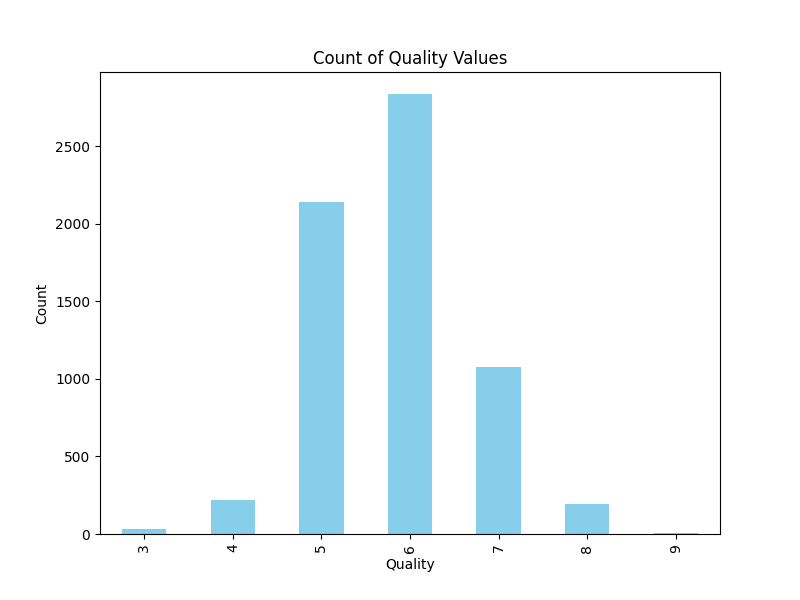

In [6]:
import matplotlib.pyplot as plt
import pandas as pd




# Convert Spark DataFrame to Pandas DataFrame
pandas_df = df.toPandas()

# Plotting the barplot
plt.figure(figsize=(8, 6))
pandas_df['quality'].value_counts().sort_index().plot(kind='bar', color='skyblue')
plt.title('Count of Quality Values')
plt.xlabel('Quality')
plt.ylabel('Count')

# Show the plot
%matplot plt

In [7]:
pandas_df.head()

    type  fixed acidity  volatile acidity  ...  sulphates  alcohol  quality
0  white            7.0              0.27  ...       0.45      8.8        6
1  white            6.3              0.30  ...       0.49      9.5        6
2  white            8.1              0.28  ...       0.44     10.1        6
3  white            7.2              0.23  ...       0.40      9.9        6
4  white            7.2              0.23  ...       0.40      9.9        6

[5 rows x 13 columns]


In [8]:
pandas_df.describe().info()

<class 'pandas.core.frame.DataFrame'>
Index: 8 entries, count to max
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         8 non-null      float64
 1   volatile acidity      8 non-null      float64
 2   citric acid           8 non-null      float64
 3   residual sugar        8 non-null      float64
 4   chlorides             8 non-null      float64
 5   free sulfur dioxide   8 non-null      float64
 6   total sulfur dioxide  8 non-null      float64
 7   density               8 non-null      float64
 8   ph                    8 non-null      float64
 9   sulphates             8 non-null      float64
 10  alcohol               8 non-null      float64
 11  quality               8 non-null      float64
dtypes: float64(12)
memory usage: 832.0+ bytes


In [9]:
pandas_df.isnull().sum()

type                     0
fixed acidity           10
volatile acidity         8
citric acid              3
residual sugar           2
chlorides                2
free sulfur dioxide      0
total sulfur dioxide     0
density                  0
ph                       9
sulphates                4
alcohol                  0
quality                  0
dtype: int64


In [10]:
pandas_df.shape

(6497, 13)


In [11]:
pandas_df.dropna(inplace=True)

In [12]:
pandas_df.shape

(6463, 13)


34 rows with null values removed

In [13]:
#pandas to spark

from pyspark.sql import SQLContext
sc = SparkContext.getOrCreate()
sqlContext = SQLContext(sc)

spark_dff = sqlContext.createDataFrame(pandas_df)


/opt/amazon/spark/python/lib/pyspark.zip/pyspark/sql/context.py:112: FutureWarning: Deprecated in 3.0.0. Use SparkSession.builder.getOrCreate() instead.
/opt/amazon/spark/python/lib/pyspark.zip/pyspark/sql/pandas/conversion.py:474: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  for column, series in pdf.iteritems():
/opt/amazon/spark/python/lib/pyspark.zip/pyspark/sql/pandas/conversion.py:486: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  for column, series in pdf.iteritems():


In [14]:
from awsglue.dynamicframe import DynamicFrame

MyDynamicFrame = DynamicFrame.fromDF(spark_dff, glueContext, "MyDynamicFrame")

#### Example: Write the data in the DynamicFrame to a location in Amazon S3 and a table for it in the AWS Glue Data Catalog


In [16]:
s3output = glueContext.getSink(
  path="s3://bucket-wine-cleaned/clean-wine-folder",
  connection_type="s3",
  updateBehavior="UPDATE_IN_DATABASE",
  partitionKeys=[],
  compression="snappy",
  enableUpdateCatalog=True,
  transformation_ctx="s3output",
)
s3output.setCatalogInfo(
  catalogDatabase="wine-cleaned-glue-database", catalogTableName="wine_dataset_cleaned"
)
s3output.setFormat("glueparquet")
s3output.writeFrame(MyDynamicFrame)

In [18]:
# Write DynamicFrame to Glue Data Catalog
glueContext.write_dynamic_frame.from_catalog(frame = MyDynamicFrame, database = wine-cleaned-glue-database, table_name = wine_dataset_cleaned)

NameError: name 'wine' is not defined
